<a href="https://colab.research.google.com/github/aawada/PHP-unit-converter/blob/master/CAP5768_Assignment2_aawada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAP 5768 - Data Science - Dr. Marques - Fall 2019

## Assignment 2: Exploratory data analysis

### Goals 

- To increase familiarity with the Python "data science stack" (NumPy, Pandas, Matplotlib).
- To explore (manipulate, summarize, and visualize) datasets. 
- To improve the ability to write Python code to answer questions and test hypotheses based on the contents of those datasets.

### Instructions

- This assignment is structured in three parts, using a different dataset for each part.
- For each part, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and (optionally) link to the "live" version of your solution on Google Colaboratory via Canvas.
- The total number of points is 154 (plus up to 85 bonus points), distributed as follows: Part 1 (58+ pts), Part 2 (28+ pts), Part 3 (43+ pts), and Conclusions (25 pts).

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!** 
- Remember: this is an exercise in performing exploratory data analysis; expanding (and practicing) your knowledge of Python, Jupyter notebooks, Numpy, Pandas, and Matplotlib; and writing code to test hypotheses and  answer questions based on the available data (and associated summary statistics).
- This is not (yet) the time to do sophisticated statistical analysis, train ML models, etc. 
- You must **organize your data files in the proper folders** for the code to work.

-------------------
## Part 1: The MovieLens 1M dataset

This is a dataset of movie ratings data collected from users of MovieLens in the late 1990s and early 2000s. The data provide movie ratings, movie metadata, and demographic data about the users. Such data is often of interest in the development of recommendation systems based on machine learning algorithms. 

The MovieLens 1M dataset contains ~1 million ratings collected from ~6,000 users on ~4,000 movies. It's spread across three tables: _ratings_, _user information_, and _movie information_. After extracting the data from the ZIP file (available on Canvas), we can load each table into a pandas DataFrame object using the Python code below.

See:
https://grouplens.org/datasets/movielens/ for additional information.

In [0]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

Before running the cell below, make sure that you have downloaded the movielens.zip file from Canvas, unzipped it, and placed its contents under the 'data' folder. 

![movielens_path.png](attachment:movielens_path.png)

In [20]:
import pandas as pd

from google.colab import drive 
drive.mount('/content/gdrive')

# Make display smaller
pd.options.display.max_rows = 10

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/assignment2/data/movielens/users.dat', sep='::',
                      header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/assignment2/data/movielens/ratings.dat', sep='::',
                        header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/assignment2/data/movielens/movies.dat', sep='::',
                       header=None, names=mnames, engine='python')

print(ratings)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
         user_id  movie_id  rating  timestamp
0              1      1193       5  978300760
1              1       661       3  978302109
2              1       914       3  978301968
3              1      3408       4  978300275
4              1      2355       5  978824291
...          ...       ...     ...        ...
1000204     6040      1091       1  956716541
1000205     6040      1094       5  956704887
1000206     6040       562       5  956704746
1000207     6040      1096       4  956715648
1000208     6040      1097       4  956715569

[1000209 rows x 4 columns]


# Your turn! (24 points, i.e., 6 pts each)

Write Python code to answer the following questions (make sure the messages displayed by your code are complete and descriptive enough):
1. How many users are stored in the _users_ table and what information is stored for each user?
2. How many movies are stored in the _movies_ table and what information is stored for each movie?
3. How many ratings are stored in the _ratings_ table and what information is stored for each rating?
4. How are users, the movies each user has rated, and the rating related?

*Note*: ages and occupations are coded as integers indicating _groups_ described in the dataset’s README file.

In [21]:
!cat 'data/movielens/README'

cat: data/movielens/README: No such file or directory


## Solution

(ENTER YOUR ANSWERS HERE)

In [22]:
# 1. How many users are stored in the users table and what information is stored for each user?
numOfRows = len(users['user_id'].index)
print("1. Number of users stored in the users table:")
print(numOfRows)

print("Information stored for each user:")
for x in unames:
  print(x)

# 2. How many movies are stored in the movies table and what information is stored for each movie?
numOfRows = len(movies['movie_id'].index)
print("\n2. Number of movies stored in the movies table:")
print(numOfRows)

print("Information stored for each movie:")
for x in mnames:
  print(x)

# 3. How many ratings are stored in the ratings table and what information is stored for each rating?
numOfRows = len(ratings['movie_id'].index)
print("\n3. Number of ratings stored in the ratings table:")
print(numOfRows)

print("Information stored for each rating:")
for x in rnames:
  print(x)

# 4. How are users, the movies each user has rated, and the rating related?
print("\n4. Users and movies are given an id. The ratings table connects the users and movies ids with a rating.")
print("Users Column:", unames[0])
print("Movies Column:", mnames[0])
print("Ratings Column 1:", rnames[0])
print("Ratings Column 2:", rnames[1])

1. Number of users stored in the users table:
6040
Information stored for each user:
user_id
gender
age
occupation
zip

2. Number of movies stored in the movies table:
3883
Information stored for each movie:
movie_id
title
genres

3. Number of ratings stored in the ratings table:
1000209
Information stored for each rating:
user_id
movie_id
rating
timestamp

4. Users and movies are given an id. The ratings table connects the users and movies ids with a rating.
Users Column: user_id
Movies Column: movie_id
Ratings Column 1: user_id
Ratings Column 2: movie_id


# Your turn! (24 points, i.e., 6 pts each)

Write Python code to answer the following questions (make sure the messages displayed by your code are complete and descriptive enough):
5. What is the occupation that maps to most of the users? Plot a histogram of the occupation counts and report the size of the largest bin.
6. What percentage of users are 50 years old or older? Plot a pie chart showing all percentages (per age group) and report the requested value.
7. Which movie received the highest number of ratings (and how were such ratings distributed)?
8. What is the average rating for all movies/users?

## Solution

(ENTER YOUR ANSWERS HERE)

5. College/grad student is the most common occupation
6. Percentage of users 50 years old or older: 15%
8. Average Rating for all movies/users:  3.6206953642384105


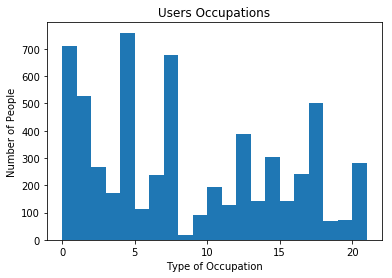

In [23]:
#5. What is the occupation that maps to most of the users? Plot a histogram of the occupation counts and report the size of the largest bin.

df = pd.DataFrame(users)

numOfPeople = len(users['occupation'].index)
numOf0s = 0
numOf1s = 0
numOf2s = 0
numOf3s = 0
numOf4s = 0
numOf5s = 0
numOf6s = 0
numOf7s = 0
numOf8s = 0
numOf9s = 0
numOf10s = 0
numOf11s = 0
numOf12s = 0
numOf13s = 0
numOf14s = 0
numOf15s = 0
numOf16s = 0
numOf17s = 0
numOf18s = 0
numOf19s = 0
numOf20s = 0

i = 0
while i < numOfPeople:
    if df['occupation'][i] == 0:
        numOf0s += 1
    if df['occupation'][i] == 1:
        numOf1s += 1
    if df['occupation'][i] == 2:
        numOf2s += 1
    if df['occupation'][i] == 3:
        numOf3s += 1
    if df['occupation'][i] == 4:
        numOf4s += 1
    if df['occupation'][i] == 5:
        numOf5s += 1
    if df['occupation'][i] == 6:
        numOf6s += 1
    if df['occupation'][i] == 7:
        numOf7s += 1
    if df['occupation'][i] == 8:
        numOf8s += 1
    if df['occupation'][i] == 9:
        numOf9s += 1
    if df['occupation'][i] == 10:
        numOf10s += 1
    if df['occupation'][i] == 11:
        numOf11s += 1
    if df['occupation'][i] == 12:
        numOf12s += 1
    if df['occupation'][i] == 13:
        numOf13s += 1
    if df['occupation'][i] == 14:
        numOf14s += 1
    if df['occupation'][i] == 15:
        numOf15s += 1
    if df['occupation'][i] == 16:
        numOf16s += 1
    if df['occupation'][i] == 17:
        numOf17s += 1
    if df['occupation'][i] == 18:
        numOf18s += 1
    if df['occupation'][i] == 19:
        numOf19s += 1
    if df['occupation'][i] == 20:
        numOf20s += 1
    i += 1

if numOf0s > numOf1s and numOf0s > numOf2s and numOf0s > numOf3s and numOf0s > numOf4s and numOf0s > numOf5s and numOf0s > numOf6s and numOf0s > numOf7s and numOf0s > numOf8s and numOf0s > numOf9s and numOf0s > numOf10s and numOf0s > numOf11s and numOf0s > numOf12s and numOf0s > numOf14s and numOf0s > numOf15s and numOf0s > numOf16s and numOf0s > numOf17s and numOf0s > numOf18s and numOf0s > numOf19s and numOf0s > numOf20s:
  print("Other or not specified is the most common occupation")

if numOf4s > numOf1s and numOf4s > numOf2s and numOf4s > numOf3s and numOf4s > numOf0s and numOf4s > numOf5s and numOf4s > numOf6s and numOf4s > numOf7s and numOf4s > numOf8s and numOf4s > numOf9s and numOf4s > numOf10s and numOf4s > numOf11s and numOf4s > numOf12s and numOf4s > numOf14s and numOf4s > numOf15s and numOf4s > numOf16s and numOf4s > numOf17s and numOf4s > numOf18s and numOf4s > numOf19s and numOf4s > numOf20s:
  print("5. College/grad student is the most common occupation")

occupations = np.array(users['occupation'])
plt.hist(occupations, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])
plt.title('Users Occupations')
plt.xlabel('Type of Occupation')
plt.ylabel('Number of People');

#6. What percentage of users are 50 years old or older? Plot a pie chart showing all percentages (per age group) and report the requested value.

#age = np.array(users['age'])
numOf50OrOlder = 0
i = 0
while i < numOfPeople:
    if df['age'][i] >= 50:
        numOf50OrOlder += 1
    i += 1
print("6. Percentage of users 50 years old or older: {0:.0%}".format(numOf50OrOlder / numOfPeople))
#plt.pie(age)

#7. Which movie received the highest number of ratings (and how were such ratings distributed)?


#8. What is the average rating for all movies/users?

df = pd.DataFrame(ratings)
totalRating = 0
i = 0
while i < numOfPeople:
    totalRating += df['rating'][i]
    i += 1
print("8. Average Rating for all movies/users: ", totalRating / numOfPeople)


-------------------
We will use the Python code below to merge all three tables into a unified data frame.

In [24]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


The Python code below will show the top 10 films among female viewers (and, for comparison's sake, the ratings for those movies by male viewers) in decreasing order (highest rated movie on top).

In [26]:
# Build pivot table
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')

# Group ratings by title
ratings_by_title = data.groupby('title').size()

# Select only movies with 250 ratings or more
active_titles = ratings_by_title.index[ratings_by_title >= 250]

# Select rows on the index
mean_ratings = mean_ratings.loc[active_titles]

# Fix naming inconsistency
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


# Your turn! (10 points, i.e., 5 pts each)

Modify the Python code to:
9. Display the top 10 favorite movies among male viewers, selecting only movies with 250 ratings or more.
10. Display the top 10 favorite movies among young viewers (17 years old or younger), selecting only movies with 300 ratings or more.

## Solution

In [33]:
#9 Display the top 10 favorite movies among male viewers, selecting only movies with 250 ratings or more.

# Build pivot table
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
# Group ratings by title
ratings_by_title = data.groupby('title').size()
# Select only movies with 250 ratings or more
active_titles = ratings_by_title.index[ratings_by_title >= 250]
# Select rows on the index
mean_ratings = mean_ratings.loc[active_titles]
# Fix naming inconsistency
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

top_female_ratings = mean_ratings.sort_values(by='M', ascending=False)
print ("9.", top_female_ratings[:10])

#10 Display the top 10 favorite movies among young viewers (17 years old or younger), selecting only movies with 300 ratings or more.
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
ratings_by_title = data.groupby('title').size()
ratings_by_age = data.groupby('age')

#active_titles = ratings_by_title.index[ratings_by_title >= 300] - ratings_by_age.index[ratings_by_age <= 17]mean_ratings = mean_ratings.loc[a
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
 'Seven Samurai (Shichinin no samurai) (1954)'})
top_female_ratings = mean_ratings.sort_values(by='M', ascending=False)
print("10.", top_female_ratings[:10])

9. gender                                              F         M
title                                                          
Godfather, The (1972)                        4.314700  4.583333
Seven Samurai (Shichinin no samurai) (1954)  4.481132  4.576628
Shawshank Redemption, The (1994)             4.539075  4.560625
Raiders of the Lost Ark (1981)               4.332168  4.520597
Usual Suspects, The (1995)                   4.513317  4.518248
Star Wars: Episode IV - A New Hope (1977)    4.302937  4.495307
Schindler's List (1993)                      4.562602  4.491415
Wrong Trousers, The (1993)                   4.588235  4.478261
Close Shave, A (1995)                        4.644444  4.473795
Rear Window (1954)                           4.484536  4.472991
10. gender                                              F         M
title                                                          
Godfather, The (1972)                        4.314700  4.583333
Seven Samurai (Shichinin no samur

# BONUS! (up to 20 points)

Write Python code to display the most divisive movies (selecting only movies with 250 ratings or more), i.e.:
- The top 10 movies with the greatest rating difference so that we can see which ones were preferred by women.
- The top 10 movies with the greatest rating difference in the opposite direction (sign) so that we can see which ones were preferred by men.

Hint/Convention: ``mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']``

## Solution

In [36]:
# The top 10 movies with the greatest rating difference so that we can see which ones were preferred by women.
print("Greatest rating difference, movies preferred by women")
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
ratings_by_title = data.groupby('title').size()
mean_ratings['diff'] = mean_ratings['F'] - mean_ratings['M']
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
 'Seven Samurai (Shichinin no samurai) (1954)'})

top_female_ratings = mean_ratings.sort_values(by='diff', ascending=False)
print (top_female_ratings[:10])


# The top 10 movies with the greatest rating difference in the opposite direction (sign) so that we can see which ones were preferred by men.
print("Greatest rating difference, movies preferred by men")
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
ratings_by_title = data.groupby('title').size()
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
 'Seven Samurai (Shichinin no samurai) (1954)'})
top_female_ratings = mean_ratings.sort_values(by='diff', ascending=False)
print (top_female_ratings[:10])

Greatest rating difference, movies preferred by women
gender                                        F         M      diff
title                                                              
Dirty Dancing (1987)                   3.790378  2.959596  0.830782
Jumpin' Jack Flash (1986)              3.254717  2.578358  0.676359
Grease (1978)                          3.975265  3.367041  0.608224
Little Women (1994)                    3.870588  3.321739  0.548849
Steel Magnolias (1989)                 3.901734  3.365957  0.535777
Anastasia (1997)                       3.800000  3.281609  0.518391
Rocky Horror Picture Show, The (1975)  3.673016  3.160131  0.512885
Color Purple, The (1985)               4.158192  3.659341  0.498851
Age of Innocence, The (1993)           3.827068  3.339506  0.487561
Free Willy (1993)                      2.921348  2.438776  0.482573
Greatest rating difference, movies preferred by men
gender                                         F         M      diff
title    

# BONUS! (up to 10 points)

Write Python code to display the top 10 movies (with 250 ratings or more) that elicited the most disagreement among viewers, independent of gender identification. 

Hint: Disagreement can be measured by the _variance_ or _standard deviation_ of the ratings.

## Solution

In [0]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...

# BONUS! (up to 10 points)

Write Python code to answer the question: 
What is the most popular movie genre? 
Plot a histogram of the genre counts and report the size of the largest bin.

Hint: use the original **movies** data frame, _before_ the merge!

## Solution

In [0]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...

------------
## Part 2: Titanic

In this part we'll use the dataset of passengers on the *Titanic*, available through the Seaborn library.

See https://www.kaggle.com/c/titanic/data for codebook and additional information.

In [0]:
titanic = sns.load_dataset('titanic')

In [41]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Questions 11-14 (16 points total, i.e. 4 pts each)

Look at the Python code below and answer the following questions (expressing the amounts in % terms):

11. How many female passengers did not survive (regardless of their class)?
12. How many first class female passengers did not survive?
13. How many male passengers did not survive (regardless of their class)?
14. How many third class male passengers did not survive?

In [0]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


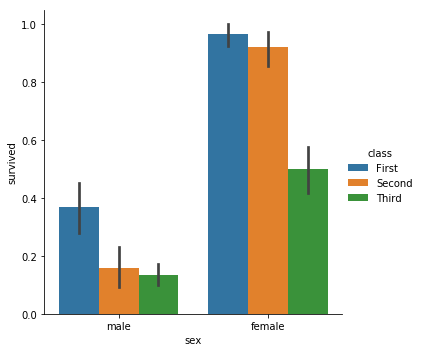

In [0]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

## Solution

11. How many female passengers did not survive (regardless of their class)?
26%

12. How many first class female passengers did not survive?
3%

13. How many male passengers did not survive (regardless of their class)?
81%

14. How many third class male passengers did not survive?
86%


## Your turn! (12 points, i.e., 4 pts each)

Write Python code to answer the following questions (make sure the messages displayed by your code are complete and descriptive enough):

15. How many passengers (absolute number) were there per deck/class? 

(**Hint**: The plot below shows how decks and classes were related and provides a visual estimate.)
16. How many passengers (absolute number) in Deck A survived?
17. How many passengers (absolute number) in Deck E survived and what was the breakdown (in Deck E) per class?

![example_categorical_plot_titanic.png](attachment:example_categorical_plot_titanic.png)

## Solution

In [69]:
print("15. How many passengers (absolute number) were there per deck/class?")
df = pd.DataFrame(titanic)
numOfPeople = len(titanic['survived'].index)
i = 0
peopleClass1 = 0
peopleClass2 = 0
peopleClass3 = 0
while i < numOfPeople:
    if df['pclass'][i] == 1:
      peopleClass1 += 1
    if df['pclass'][i] == 2:
      peopleClass2 += 1
    if df['pclass'][i] == 3:
      peopleClass3 += 1
    i += 1 
print ("Number of passengers first class:", peopleClass1)
print ("Number of passengers second class:", peopleClass2)
print ("Number of passengers third class:", peopleClass3)

i = 0
peopleDeckA = 0
peopleDeckB = 0
peopleDeckC = 0
peopleDeckD = 0
peopleDeckE = 0
peopleDeckF = 0
peopleDeckG = 0
peopleDeckUnknown = 0

while i < numOfPeople:
    if df['deck'][i] == 'A':
        peopleDeckA += 1
    if df['deck'][i] == 'B':
       peopleDeckB += 1
    if df['deck'][i] == 'C':
        peopleDeckC += 1
    if df['deck'][i] == 'D':
        peopleDeckD += 1
    if df['deck'][i] == 'E':
       peopleDeckE += 1
    if df['deck'][i] == 'F':
       peopleDeckF += 1
    if df['deck'][i] == 'G':
       peopleDeckG += 1
    else:
      peopleDeckUnknown += 1
    i += 1 
    
print ("Number of passengers deck A:", peopleDeckA)
print ("Number of passengers deck B:", peopleDeckB)
print ("Number of passengers deck C:", peopleDeckC)
print ("Number of passengers deck D:", peopleDeckD)
print ("Number of passengers deck E:", peopleDeckE)
print ("Number of passengers deck F:", peopleDeckF)
print ("Number of passengers deck G:", peopleDeckG)
print ("Number of passengers unknown deck:", peopleDeckUnknown)

print ("\n16. How many passengers in Deck A survived?")
i = 0
survivorsDeckA = 0
while i < numOfPeople:
  if df['deck'][i] == 'A' and df['survived'][i] == 1:survivorsDeckA += 1
  i += 1
print ("Number of passengers in Deck A that survived:", survivorsDeckA)

15. How many passengers (absolute number) were there per deck/class?
Number of passengers first class: 216
Number of passengers second class: 184
Number of passengers third class: 491
Number of passengers deck A: 15
Number of passengers deck B: 47
Number of passengers deck C: 59
Number of passengers deck D: 33
Number of passengers deck E: 32
Number of passengers deck F: 13
Number of passengers deck G: 4
Number of passengers unknown deck: 887

16. How many passengers in Deck A survived?
Number of passengers in Deck A that survived: 7


# BONUS! (up to 20 points)

Write Python code to answer the following questions (using percentage values):
- How many women traveling alone did not survive?
- How many men 35 years old or younger did not survive?
- What was the average fare per class?

## Solution

In [0]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...

------------
## Part 3: US Baby Names 1880–2018

The United States Social Security Administration (SSA) has made available data on the frequency of baby names from 1880 through the present. These plain text data files, one per year, contain the total number of births for each sex/name combination. The raw archive of these files can be obtained from http://www.ssa.gov/oact/babynames/limits.html.

After downloading the 'National data' file _names.zip_ and unzipping it, you will have a directory containing a series of files like _yob1880.txt_ through _yob2018.txt_. We need to do some data wrangling to load this dataset (see code below).

For your convenience, I have made the _names.zip_ file available on Canvas. 
Before running the cell below, make sure that you have downloaded it, unzipped it, and placed its contents under the 'data' folder. 

![names_path.png](attachment:names_path.png)

In [0]:
years = range(1880, 2019)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = '/content/gdrive/My Drive/Colab Notebooks/assignment2/data/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [0]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1957041,Zylas,M,5,2018
1957042,Zyran,M,5,2018
1957043,Zyrie,M,5,2018
1957044,Zyron,M,5,2018


## Your turn! (25 points)

Write Python code to compute the number of baby boys and baby girls born each year and display the two line plots over time. 

Hint: Start by aggregating the data at the year and sex level using ``groupby`` or ``pivot_table``.

Your plot should look like this:

![birth_vs_year.png](attachment:birth_vs_year.png)

## Solution

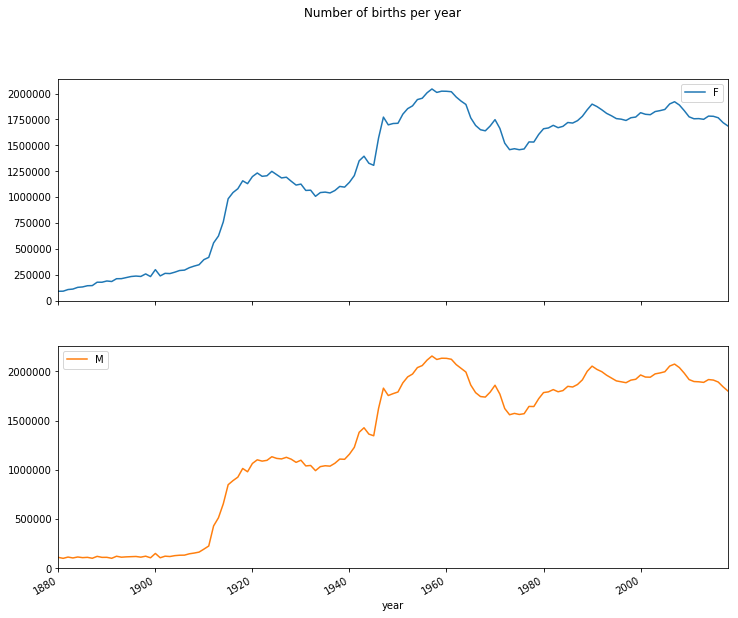

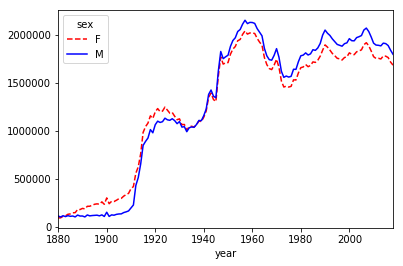

In [54]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

total_births = names.pivot_table('births', index='year',
                                 columns='sex',
                                 aggfunc=sum)

total_births.plot(subplots=True, figsize=(12, 10), grid=False,
             title="Number of births per year")
total_births.plot(style={'M': 'b-', 'F': 'r--'})

-------------
## Analyzing Naming Trends

Suppose we're interested in analyzing the Top 1000 most popular baby names per year.

We will do so by following these steps:
1. Insert a column _prop_ with the fraction of babies given each name relative to the total number of births. A prop value of 0.02 would indicate that 2 out of every 100 babies were given a particular name in a given year. 
2. Group the data by year and sex, then add the new column to each group.
3. Extract a subset of the data (the top 1,000 names for each sex/year combination). This is yet another group operation.
4. Split the Top 1,000 names into the boy and girl portions.
5. Build a pivot table of the total number of births by year and name.

Finally, we will plot the percentage of babies named 'John', 'Noah', 'Madison', or 'Lorraine' over time.

In [0]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [57]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1957041,Zylas,M,5,2018,0.000003
1957042,Zyran,M,5,2018,0.000003
1957043,Zyrie,M,5,2018,0.000003
1957044,Zyron,M,5,2018,0.000003


In [58]:
# Sanity check (all percentages should add up to 1, i.e., 100%)
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2016  M      1.0
2017  F      1.0
      M      1.0
2018  F      1.0
      M      1.0
Name: prop, Length: 278, dtype: float64

In [0]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

In [60]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
277872,Korbyn,M,207,2018,0.000115
277873,Randall,M,207,2018,0.000115
277874,Benton,M,206,2018,0.000114
277875,Coleman,M,206,2018,0.000114


In [0]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [0]:
total_births = top1000.pivot_table('births', index='year',
                                   columns='name',
                                   aggfunc=sum)

In [63]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 1880 to 2018
Columns: 7174 entries, Aaden to Zyaire
dtypes: float64(7174)
memory usage: 7.6 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8de2731be0>,
      dtype=object)

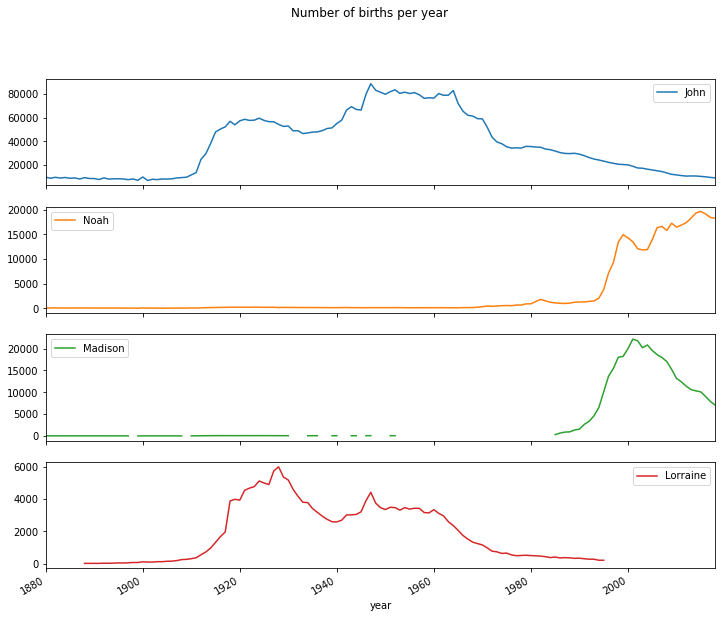

In [64]:
subset = total_births[['John', 'Noah', 'Madison', 'Lorraine']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")

--------------
# BONUS! (up to 25 points)

Write Python code to test the hypothesis:

H1: There has been an increase in naming diversity over time. 

Hint: Compute a metric that consists of the number of distinct names, taken in order of popularity from highest to lowest, in the top 50% of births, and plot that metric over time.

Your plot should look like this:

![naming_diversity.png](attachment:naming_diversity.png)

## Solution

In [0]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...

-------------
## Boy names that became girl names (and vice versa)

Next, let's look at baby names that were more popular with one sex earlier in the sample but have switched to the opposite sex over the years. One example is the name Lesley or Leslie (or other possible, less common, spelling variations). 

We will do so by following these steps:
1. Go back to the top1000 DataFrame and compute a list of names occurring in the dataset starting with “lesl”.
2. Filter down to just those names and sum births grouped by name to see the relative frequencies.
3. Aggregate by sex and year and normalize within year.
4. Plot the breakdown by sex over time.

In [0]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4264    Leslee
4732     Lesli
6108     Lesly
dtype: object

In [0]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35033
Lesli        929
Leslie    378168
Lesly      11433
Name: births, dtype: int64

In [0]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)

<Figure size 432x288 with 0 Axes>

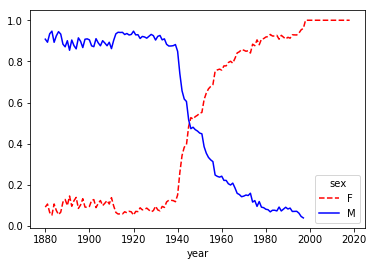

In [0]:
fig = plt.figure()
table.plot(style={'M': 'b-', 'F': 'r--'})

---------------------

Now it's time for you to come up with a different hypotheses, which we will call H2. **Be creative!**

Example: The name 'Reese' has been more prevalent among baby girls than baby boys since 2000.

## Your turn! (28 points)

Write Python code to test hypothesis H2 (and some text to explain whether it was confirmed or not).

## Solution

H2: The name 'Riley' is more common among baby girls than baby boys since 2000.
The hypothesis is true, The name 'Riley' is more common among baby girls than baby boys since 2000.


<Figure size 432x288 with 0 Axes>

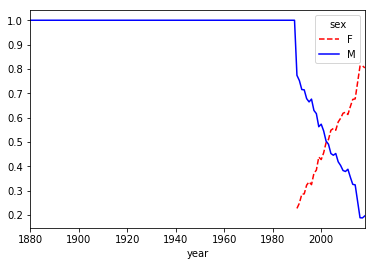

In [67]:
print("H2: The name 'Riley' is more common among baby girls than baby boys since 2000.")
      
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('riley')]
      
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

table = filtered.pivot_table('births', index='year',
 columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)

fig = plt.figure()
table.plot(style={'M': 'b-', 'F': 'r--'})

print("The hypothesis is true, The name 'Riley' is more common among baby girls than baby boys since 2000.")


## Conclusions (25 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

## Solution

For this assignment, I learned much more about manipulating data and creating Matplotlib graphs and new tables. Using NumPy and Pandas, I was able to read from large datasets and make assumptions based on the data. Making the graphs and manipulating the data was the best part of the assignment. The most challenging question 17 in part 2. I couldn't get the statments to display the data correctly, and if I had an extra week, I would have worked on getting that to work. 